In [ ]:
#!pip install torch==2.2.1


In [ ]:
#たぶん入力不要　ハードによってmatlibplotでエラーが出る時の対策
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# pytorch で深層学習(1)

<div style="text-align: right;">
2022/08/01 中山将伸作成<BR>
</div>
    
1) Tensor形式の取り扱い<BR>
2) モデル関数・損失関数<BR>
3) 最適化・エポック・学習率<BR>

In [ ]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

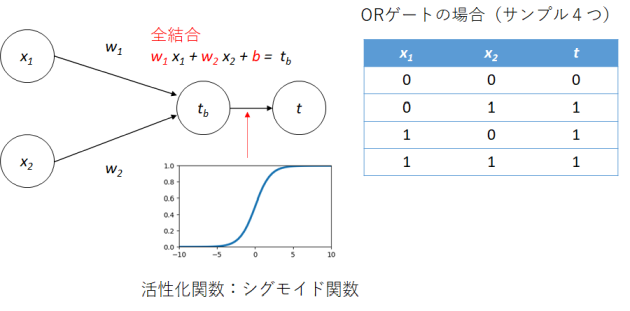

## 1. Tensor形式で入力データ作成
pytorchでは、numpyのarray形式ではなく、独自の Tensor形式でデータをハンドリングします。<BR>
ただし、ほぼnumpyと同じような使い勝手です。<BR>

In [ ]:
Xnp=np.array([[0,0],[0,1],[1,0],[1,1]])
Xnp


In [ ]:
X=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t=torch.Tensor([[0],[1],[1],[1]])
print (X)
print (t)

In [ ]:
#操作不要 (numpy-array > torch-tensor)   

#Xtc = torch.from_numpy(Xnp)
Xtc = torch.Tensor(Xnp)
Xtc

In [ ]:
#操作不要 (torch-tensor > numpy-array)   

Xnp2 = Xtc.detach().numpy()
Xnp2

## 2. モデル関数と損失関数の定義

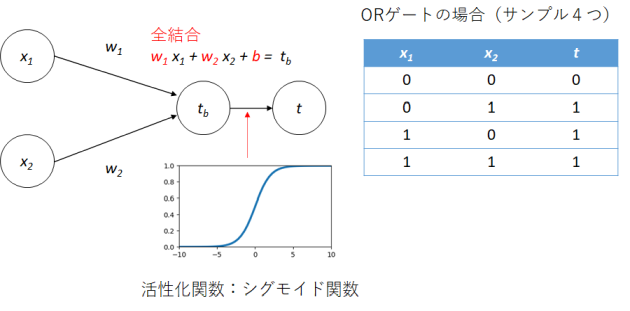

In [ ]:
model= nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid(),
)

In [ ]:
X

In [ ]:
y=model(X)
y

In [ ]:
list(model.parameters())

In [ ]:
loss_fn = nn.MSELoss()
loss_fn(y,t)

## 3.モデル関数のWeight と biasの最適化

optimizerの設定  SGD: 性能はよくない<BR>
epoch数、学習率 lr<BR>
model > trainモードにすることで更新<BR>

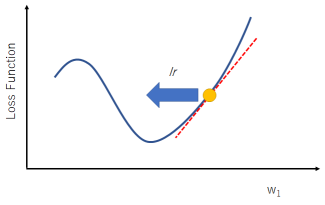

In [ ]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.05)  #model.parameters() 学習させたい変数　　lr は学習率

loss_history=[]

In [ ]:
model.train()

for epoch in range(10000):  #epoch数 更新処理の回数（ハイパーパラメーター）
    optimizer.zero_grad()   #optimizerの初期化
    y=model(X)
    loss=loss_fn(y,t)
    loss_history.append(float(loss))
    loss.backward()   #傾きを計算 (lossを最小化するように)
    optimizer.step()   #更新処理実施

y



In [ ]:
plt.plot(loss_history)

In [ ]:
y

In [ ]:
loss_fn(y,t)

In [ ]:
plt.scatter(y.detach().numpy(),t.detach().numpy())